In [50]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import scipy

In [2]:
dataset = pd.read_csv("affd.csv")

In [3]:
dataset.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# Data set info and objective 
1. The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

2. 122 instances for each region.
## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
### Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
### FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



In [4]:
dataset.columns

Index(['Bejaia Region Dataset '], dtype='object')

#### the dataset is doivided into region due to wichi coloumns are not visible so remove the location divide and make the new column for the same

In [5]:
dataset.to_csv('Affa_new.csv',header=False)

In [6]:
dataset_new = pd.read_csv('Affa_new.csv')

In [7]:
dataset_new.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Now need to remove the middle location line

In [8]:
dataset_new.iloc[[122,123]]###----> Remove this data set points and remember the Index "122"

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [9]:
dataset_new.drop(index=[122,123],inplace=True)

In [10]:
dataset_new.iloc[[122,123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


## Now create one column name location 
### where the 1 ---> Bejaia Region Dataset
### and 0 ----> Sidi-Bel Abbes Region Dataset

In [11]:
dataset_new["Location"] = [1 if i < 122 else 0 for i in range(dataset_new.shape[0])] 

In [12]:

dataset_new.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [13]:
## Now our dataset is ready for EDA

## As we are predecting the tempreture as aq target so we will focus on tempreture as target 

In [14]:
### Get the Basic Information 


In [15]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Location     244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [16]:
dataset_new.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Location       0
dtype: int64

# Observation 
1. Seems to be no null value present in the dataset except 1 in classes 
2. All the dataset datatype is object except location we need to convert them either float or int
3. Looking at data looks like All the numerical values are in float format
4. Classes and location is categorical value 
5. There are total 224 entries in the dataset with 14 features 

In [17]:
dataset_new[dataset_new['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,0


In [18]:
dataset_new['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [19]:
### convert the categorical Valur in numeric 
dataset_new['Classes  '] = dataset_new['Classes  '].map({'not fire   ':0, 'fire   ':1, 'fire':1, 'fire ':1, 'not fire':0, 'not fire ':0,'not fire     ':0, 'nan':1, 'not fire    ':0})

1. here We have FWI as fire which is not valid value 
2. Rerplace this value with middin of FWI

In [20]:
dataset_new['FWI'][dataset_new['FWI']=='fire   '] = None 

C:\Users\HP\AppData\Local\Temp/ipykernel_13120/3518315269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['FWI'][dataset_new['FWI']=='fire   '] = None


In [21]:
dataset_new['FWI'].iloc[167]

'7.3'

In [22]:
dataset_new[dataset_new['FWI']=='fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location


In [23]:
dataset_new.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Location       0
dtype: int64

In [24]:
dataset_new[dataset_new['Classes  '].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,None,NaN,0


In [25]:
dataset_new[dataset_new['FWI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,None,NaN,0


In [26]:
dataset_new['Classes  '].fillna(1,inplace=True)
dataset_new['FWI'].fillna(dataset_new['FWI'].median(),inplace=True)

In [27]:
dataset_new.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Location       0
dtype: int64

### Now the Dataset is Ready for further EDA

In [28]:
### now need to convert the dataset dtype into float 
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    float64
 14  Location     244 non-null    int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 30.5+ KB


In [29]:
dataset_new['DC'][dataset_new['DC']=='14.6 9'] = '14.69'

C:\Users\HP\AppData\Local\Temp/ipykernel_13120/4039764710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['DC'][dataset_new['DC']=='14.6 9'] = '14.69'


In [71]:
for i in dataset_new.columns[:13]:
    dataset_new[i] = dataset_new[i].astype(float)

In [72]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    float64
 14  Location     244 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 30.5 KB


In [73]:
## Now our DAta is ready for further exploration 
## now check for central charateristic of features 
dataset_new.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.02377,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.42746,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.00000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.70000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.20000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.37500,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.10000,1.000000,1.000000


In [74]:
## here year is same for every datapoint 
## so we will drop the year column
df = dataset_new.drop('year',axis=1)

In [75]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1


In [76]:
df['month'].unique()

array([6., 7., 8., 9.])

<Figure size 1440x1800 with 0 Axes>

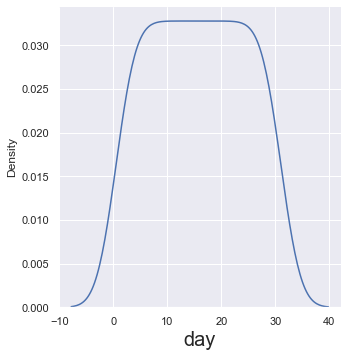

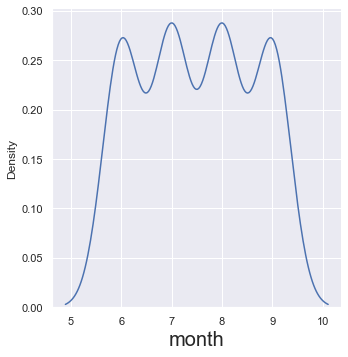

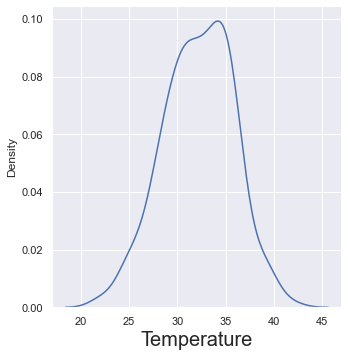

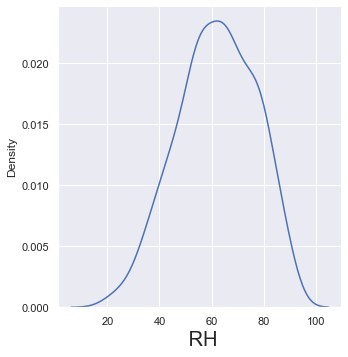

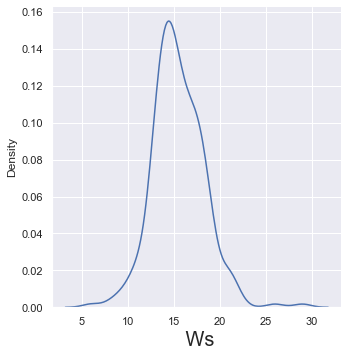

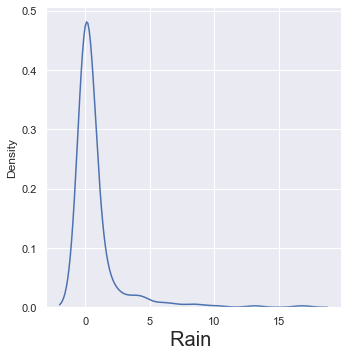

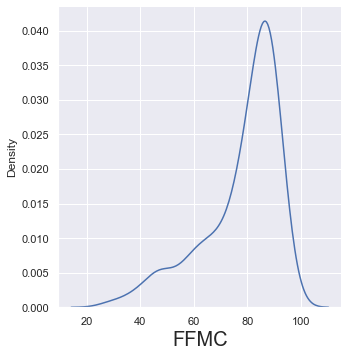

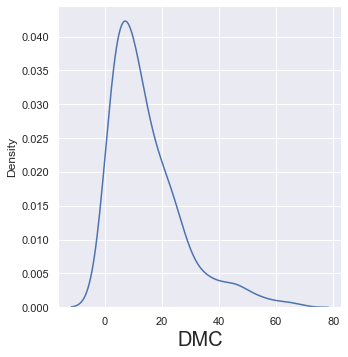

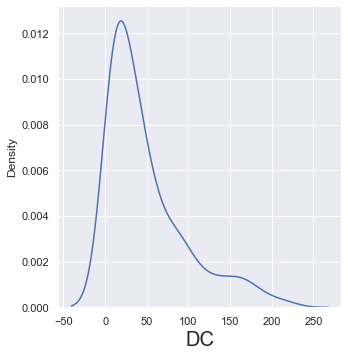

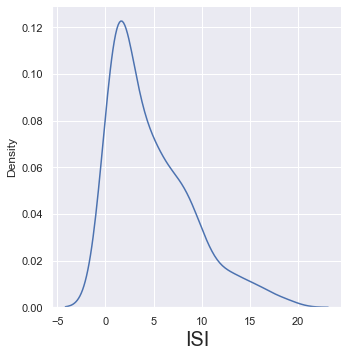

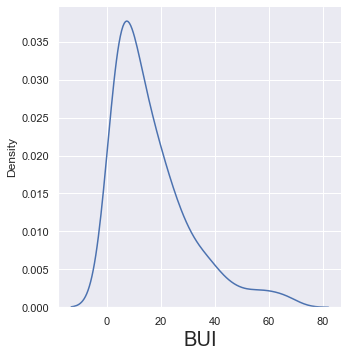

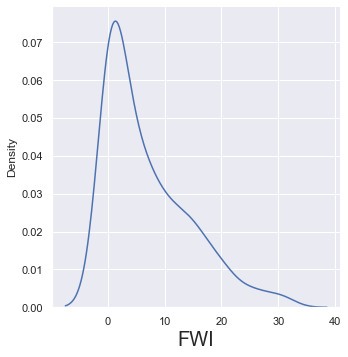

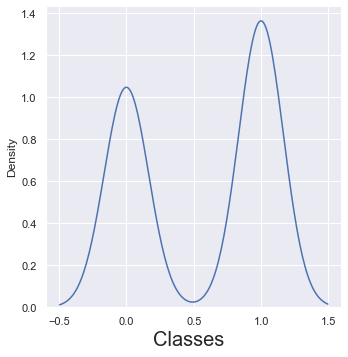

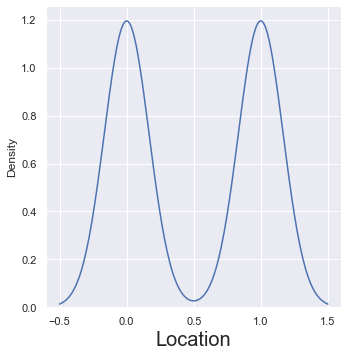

In [77]:
## Now let see the distribution of features
plt.figure(figsize=(20,25),facecolor='white')
for i in df.columns:
    sns.displot(df[i],kind='kde')
    plt.xlabel(i,fontsize=20)
    plt.show()

## Observation 
1. Ignore the day month classes and location because either are discrit or categorical values
2. Temperatrture rh and ws seem to be have normal distrubutaion with some noise 
3. Columns FFMC has left skewde 
4. Columns Rain, DMS, Dc, ISI, BUI, FWI has right skewde

In [45]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Location'],
      dtype='object')

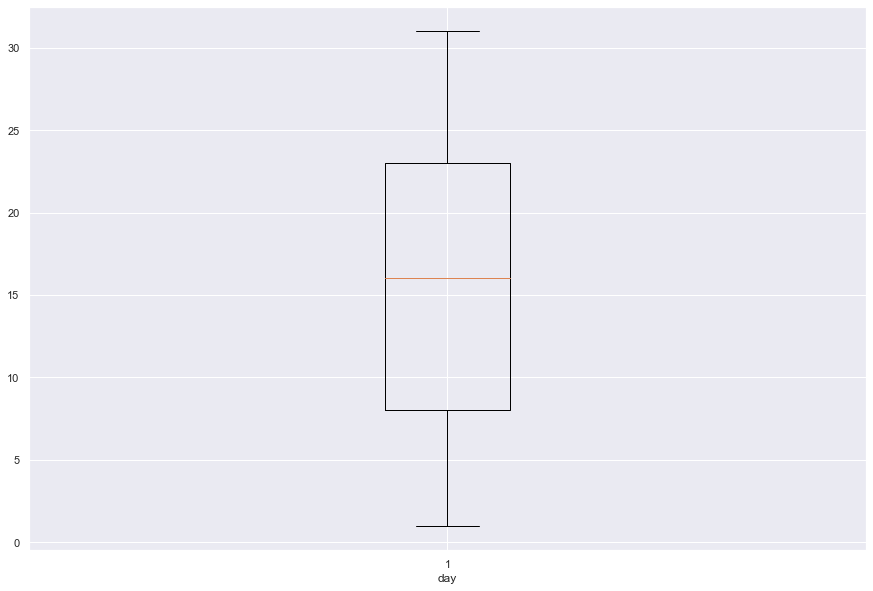

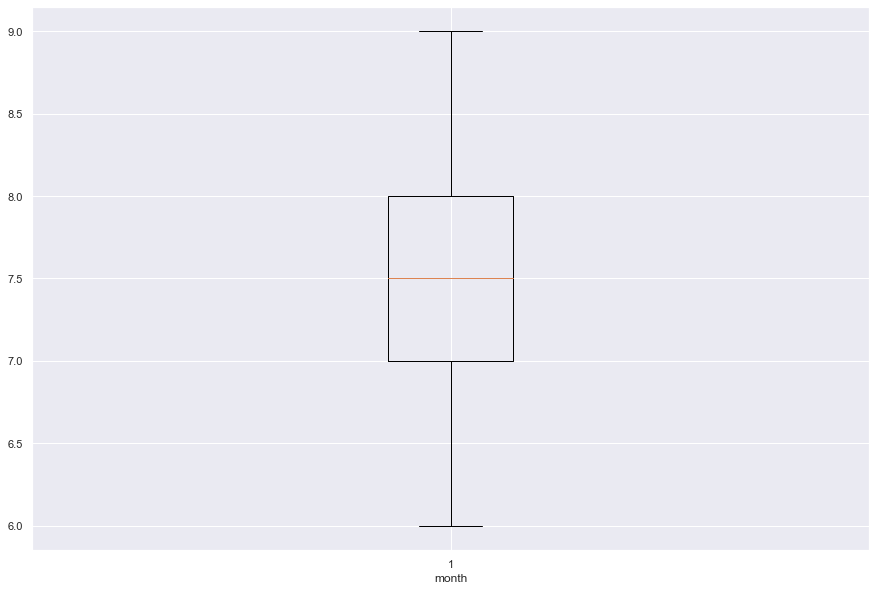

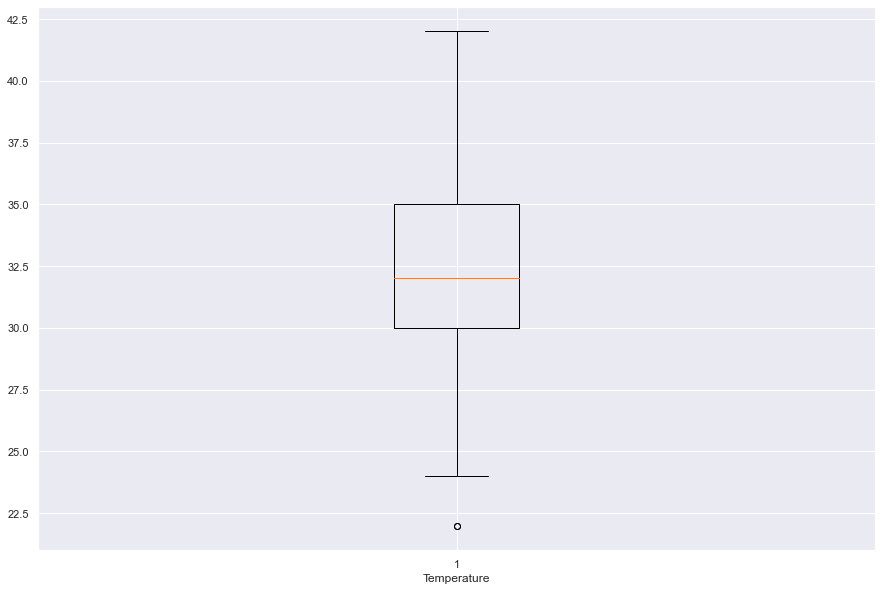

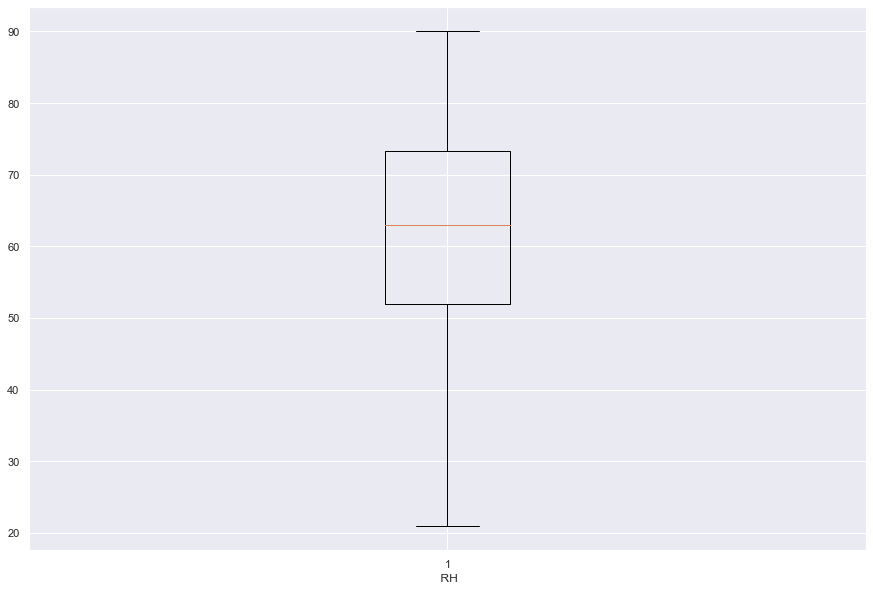

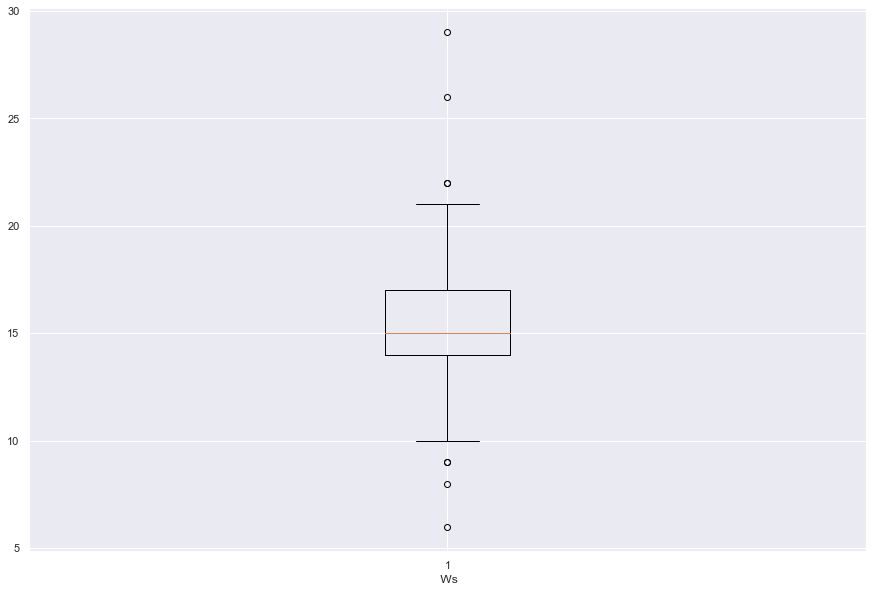

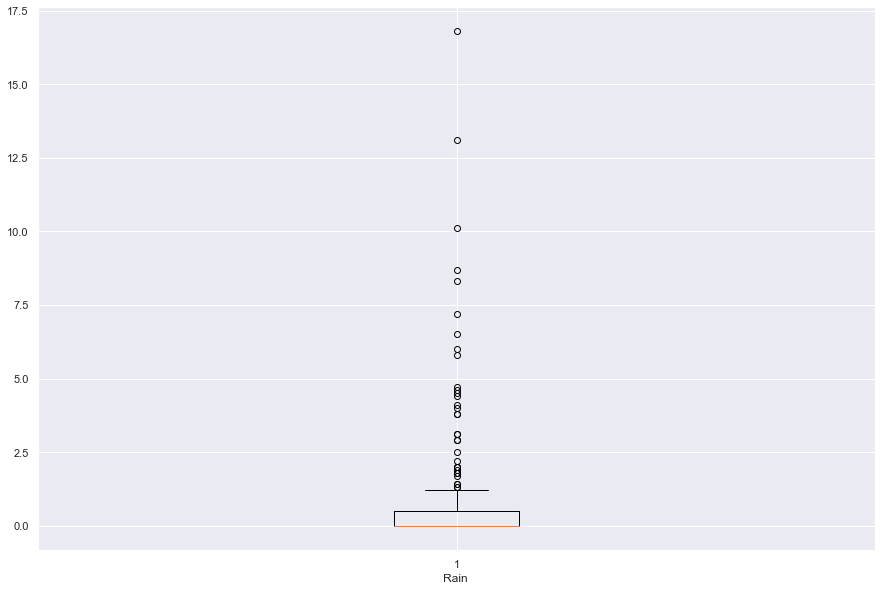

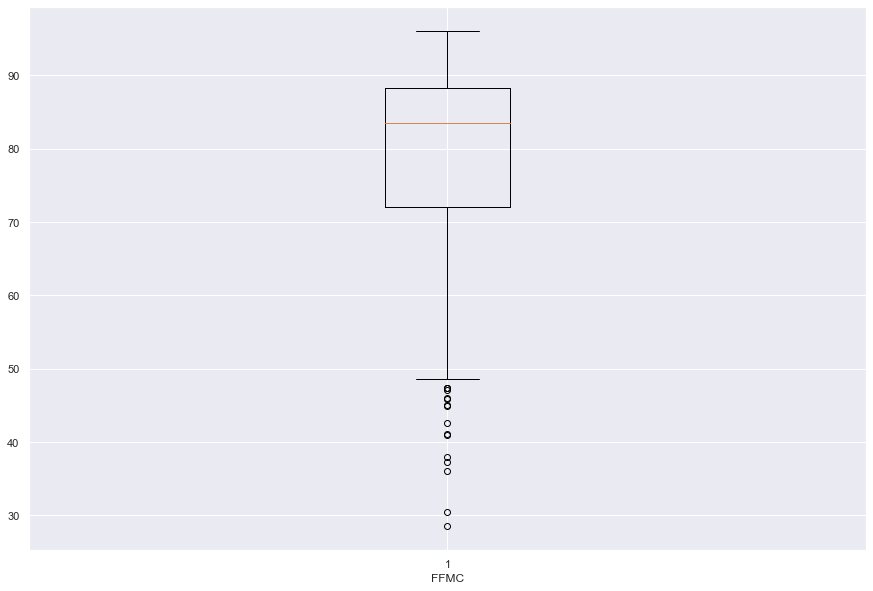

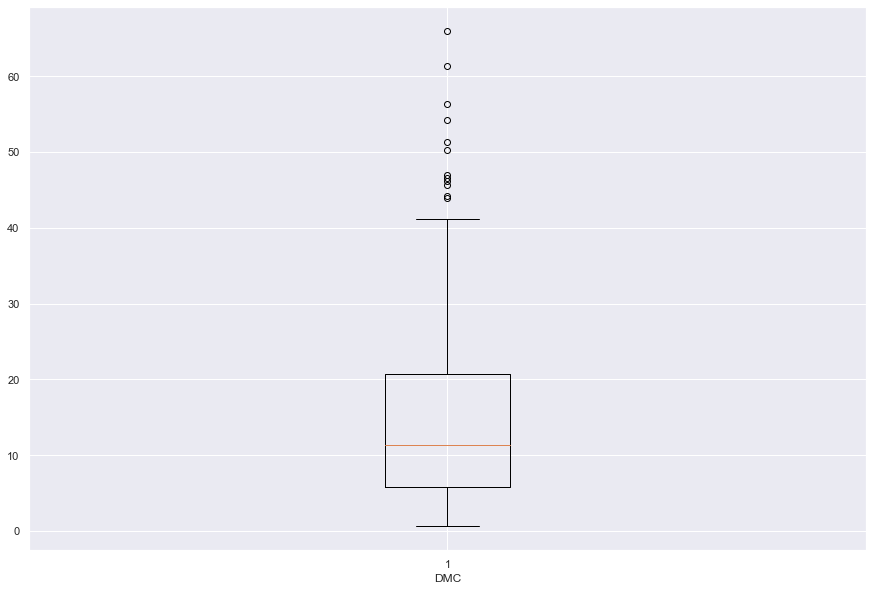

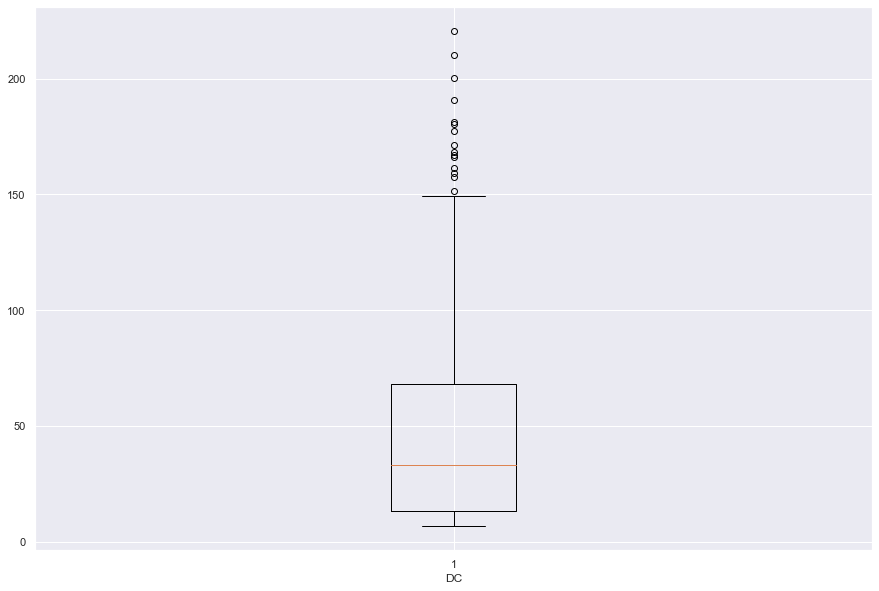

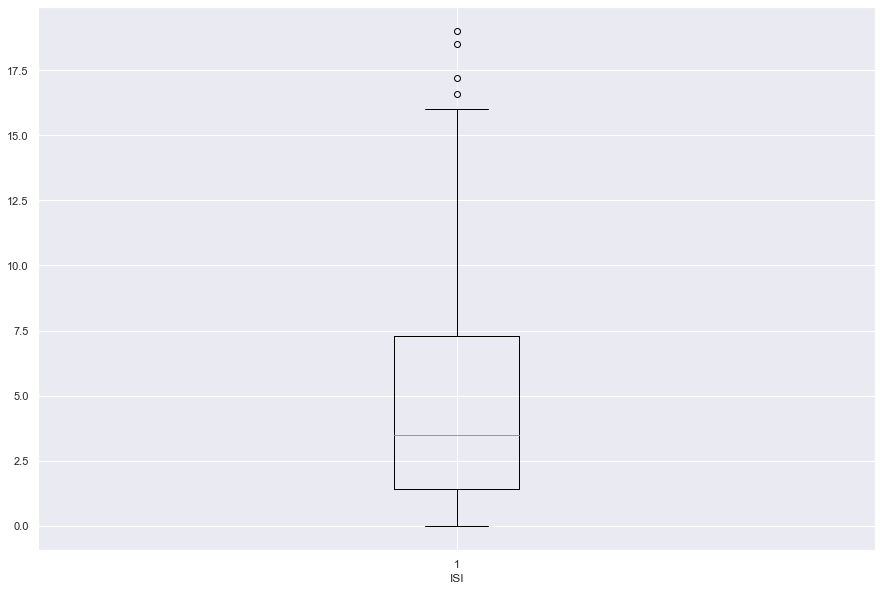

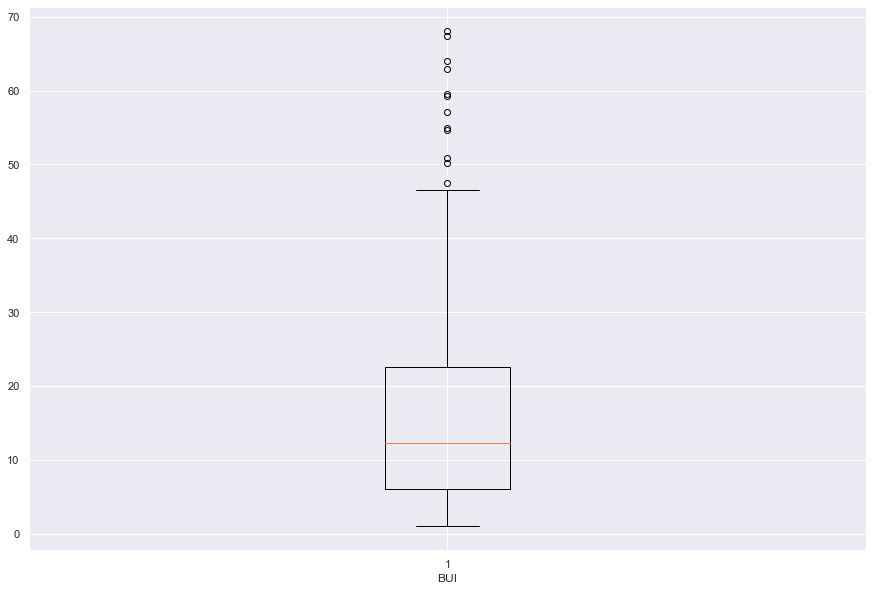

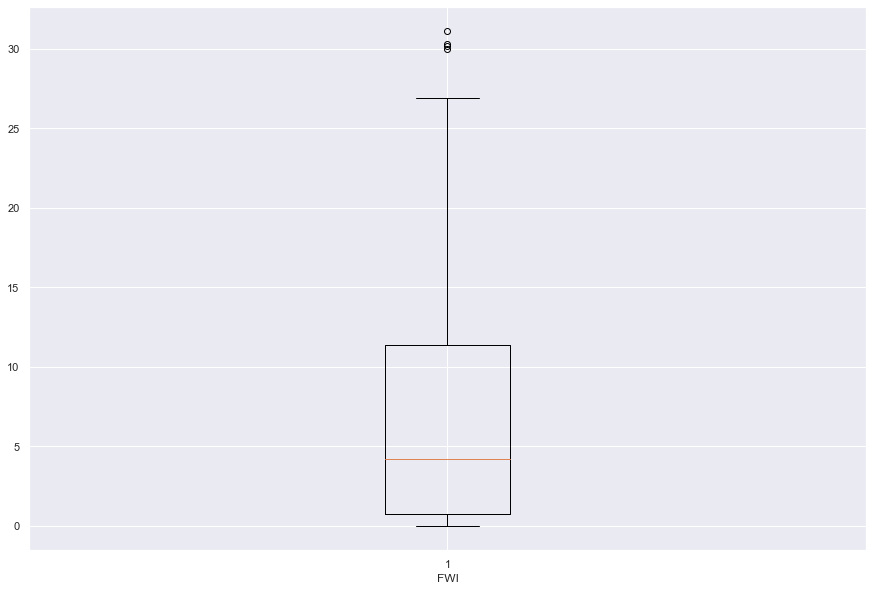

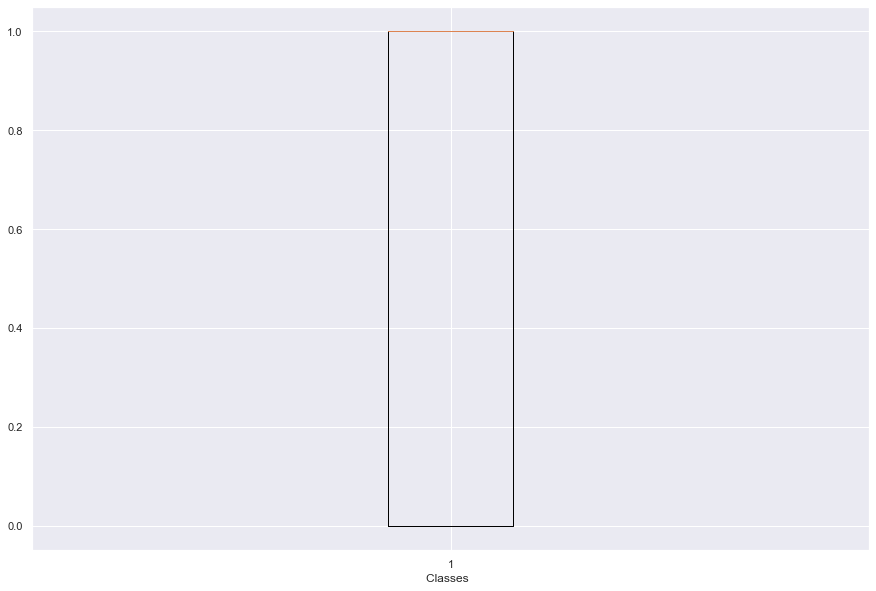

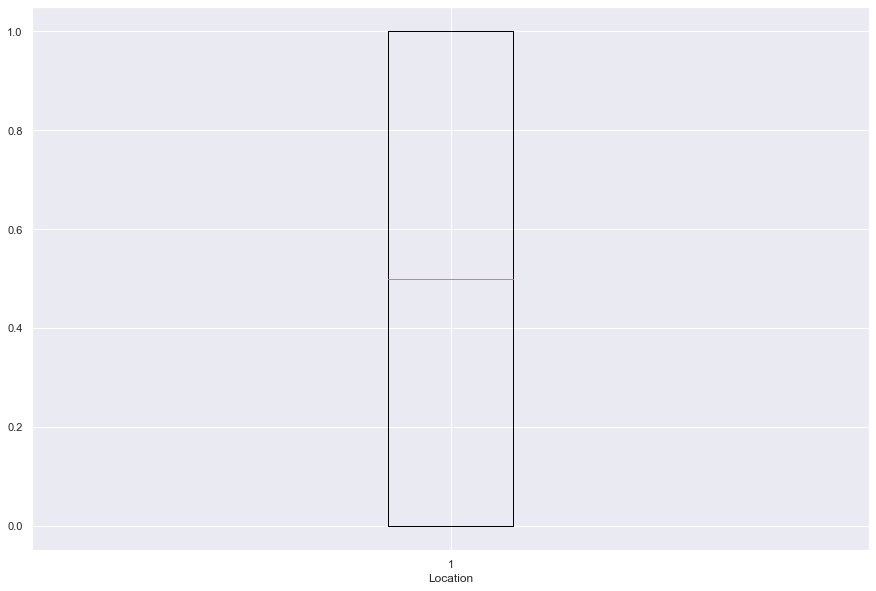

In [78]:
# Check for the outliers by box plot
for i in df.columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

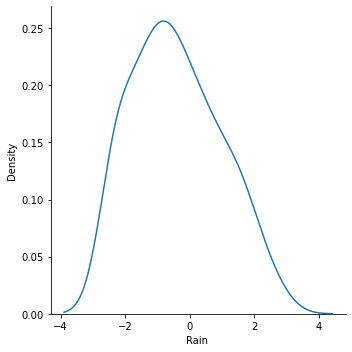

In [57]:
sns.displot(df['Rain '],kind='kde')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain '>

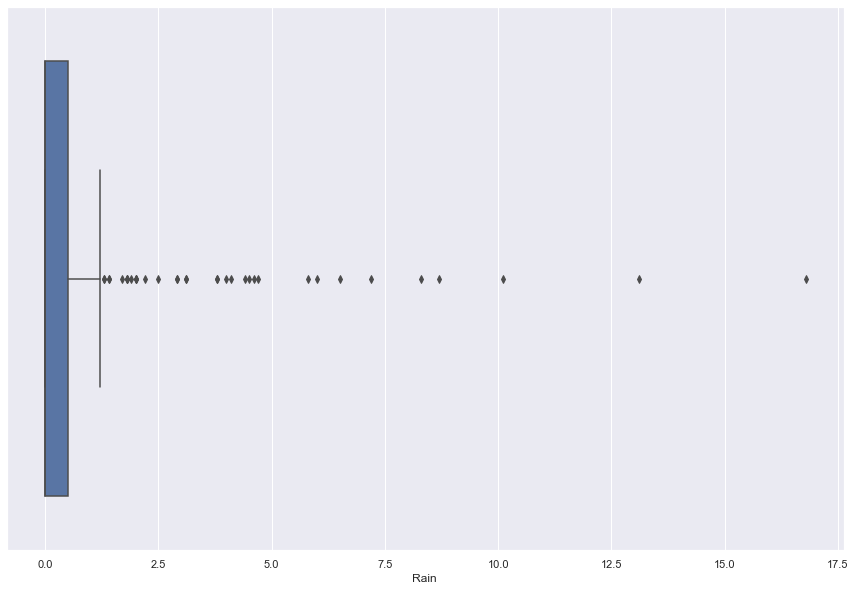

In [79]:
sns.boxplot(df['Rain '])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain '>

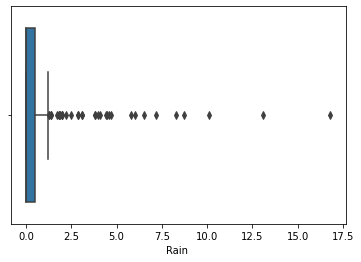

In [59]:
sns.boxplot(dataset_new['Rain '])

In [60]:
# we have major outlayers in rain and fmmc

<AxesSubplot:>

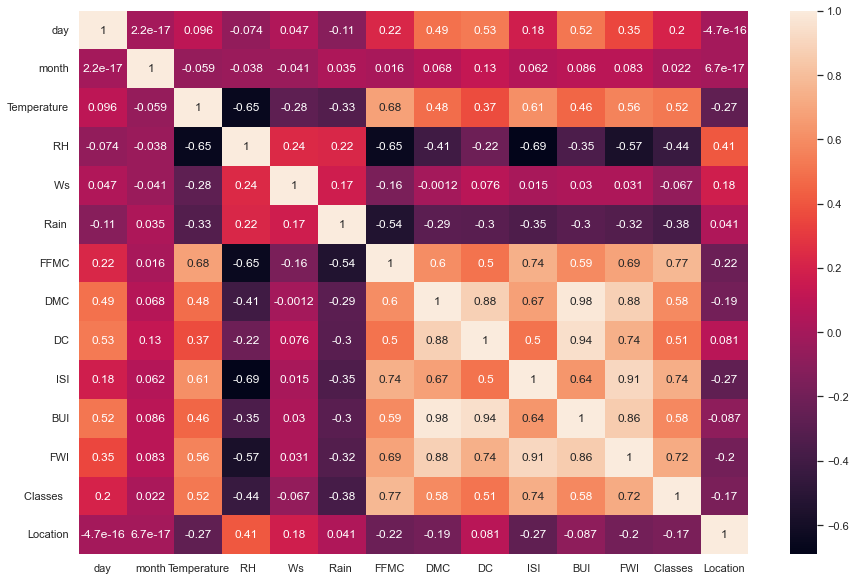

In [80]:
## Check for colinrarity 
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

In [82]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Location
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350960,0.201784,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083285,0.022333,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.518119,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.435023,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.066529,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.379449,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.770114,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.584188,-1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.507132,8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.735511,-2.684206e-01


In [83]:
## now data is ready for feature scalling 
## as we are focusing on temprature we will put Temprature as target 
x = df.drop('Temperature',axis=1)
y = df['Temperature']

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [85]:
## Apply Standard scalling on them 
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X = x_train)
x_test = scaler.transform(x_test)  ##----->> To avoid data leakage We use transform insted of fit_transform 


In [86]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()


In [87]:
# x_trani is indipendent feature y_train isdependent feature
regression.fit(x_train,y_train)

LinearRegression()

In [88]:
## Print the coifficent and interpcet 
print(regression.coef_)
print(regression.intercept_)

[-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
 -0.08345626]
31.98159509202454


In [89]:
## Predection for the test data
reg_pred = regression.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

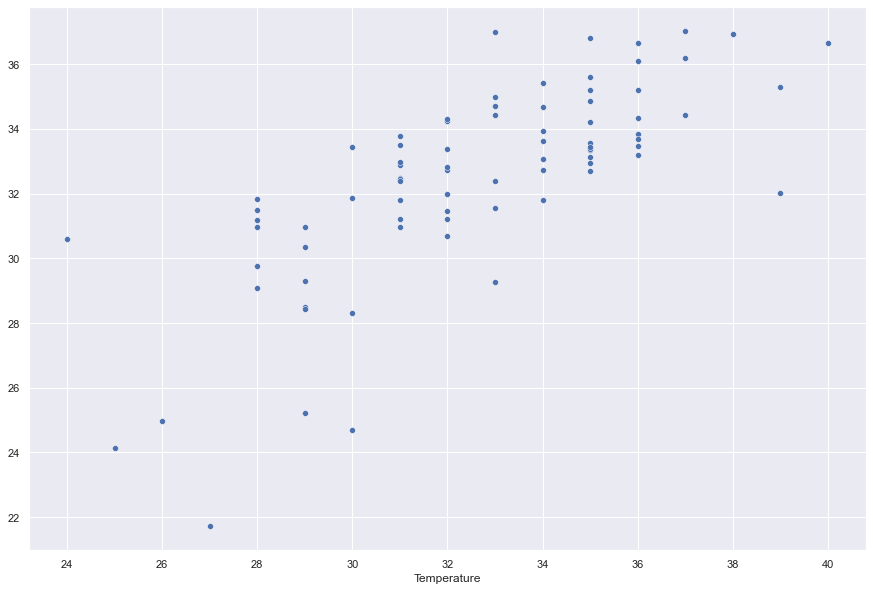

In [90]:
## Assumption with respect to predection 
sns.scatterplot(y_test,reg_pred)

In [91]:
## residule 
residuals = y_test - reg_pred

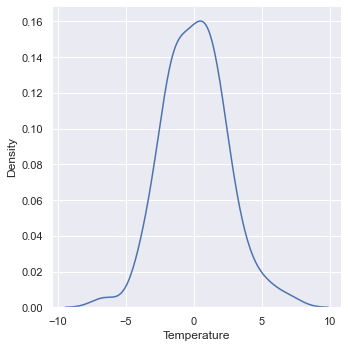

In [92]:
sns.displot(residuals,kind= 'kde')

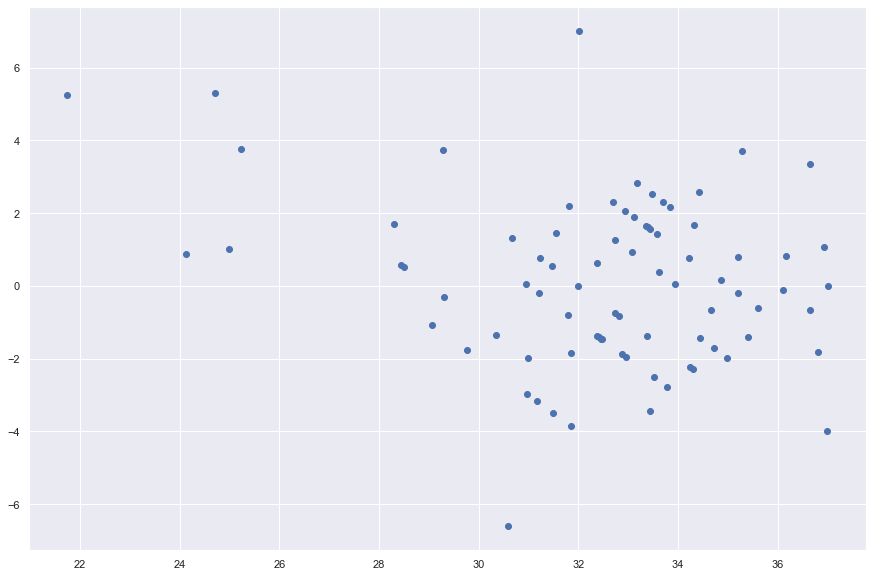

In [93]:
## Scatter plot with prediction and residual
## uniform Distridution should not have any patern 
plt.scatter(reg_pred,residuals )

In [94]:
## Performance Matrix 
from sklearn.metrics import mean_squared_error , mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))

5.246171801051388
1.8048961685622633


In [95]:
## R squared and adjusted R squared 
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.511563315074526


In [96]:
### Formula for Adjusted r sruare
1 - (1 - score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4167920179994341